# SMS SPAM Classifier
## Table of Content
* [Importing Necessary Libraries](#lib)
* [Importing the Dataset](#data)
* [Creating Classification Report](#clf)
* [Building Pipelines, Tuning Parameters and Displaying Classification Report](#build)
* [Final Report: The Dilema of Accuracy and Precision](#final)
* [Dumping the Best Pipeline](#dumping)

## Importing Necessary Libraries <a id='lib'></a>

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset <a id='data'></a>

In [155]:
df = pd.read_csv('spam_sms_collection.csv').drop(['Unnamed: 0'], axis=1)
df.dropna(inplace=True)
df.head()

,spam,msg_length,msg
0,0,111,go jurong point crazy available bugis n great ...
1,0,29,ok lar joking wif u oni
2,1,155,free entry wkly comp win fa cup final tkts st ...
3,0,49,u dun say early hor u c already say
4,0,61,nah think go usf life around though


## Creating Classification Report <a id='clf'></a>

In [156]:
def create_classification_report(Y_test, Y_pred):
    print('--------Classification Report---------\n')
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    metrices = [accuracy, f1, precision, recall, roc_auc]
    scores = pd.DataFrame(pd.Series(metrices).values, index=['accuracy', 'f1-score', 'precision', 'recall', 'roc auc score'], columns=['score'])
    print(scores)
    print('\n--------Plotting Confusion Matrix---------')
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='RdYlGn_r', annot_kws={'size': 16})
    return scores

In [199]:
X = df['msg'] # Independent Features
Y = df['spam'] # Dependent Features
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=44)

## Building Pipelines, Tuning Parameters and Displaying Classification Report <a id='build'></a>

In [158]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500],
        'model': [MultinomialNB()]
    },
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500],
        'model': [MultinomialNB()]
    }
]

--------Classification Report---------

                  score
accuracy       0.990117
f1-score       0.961404
precision      0.985612
recall         0.938356
roc auc score  0.968144

--------Plotting Confusion Matrix---------


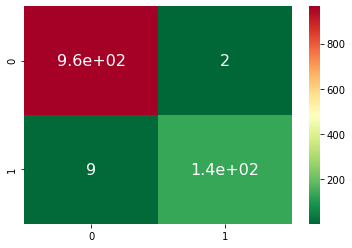

In [159]:
best_pipeline = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    cv=10, 
    scoring='accuracy', 
    n_jobs=1
)
pipeline1 = best_pipeline.fit(X_train, Y_train)
Y_pred = best_pipeline.predict(X_test)
scores1 = create_classification_report(Y_test, Y_pred)

--------Classification Report---------

                  score
accuracy       0.990117
f1-score       0.961404
precision      0.985612
recall         0.938356
roc auc score  0.968144

--------Plotting Confusion Matrix---------


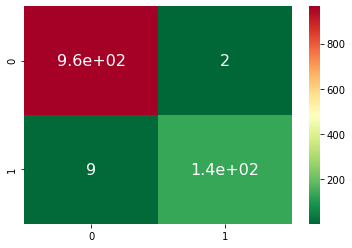

In [160]:
best_pipeline = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    cv=10, 
    scoring='f1', 
    n_jobs=1
)
pipeline2 = best_pipeline.fit(X_train, Y_train)
Y_pred = best_pipeline.predict(X_test)
scores2 = create_classification_report(Y_test, Y_pred)

--------Classification Report---------

                  score
accuracy       0.977538
f1-score       0.906367
precision      1.000000
recall         0.828767
roc auc score  0.914384

--------Plotting Confusion Matrix---------


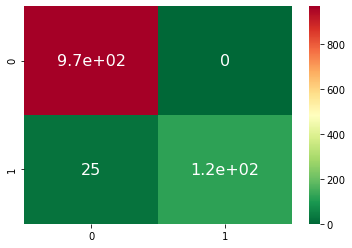

In [161]:
best_pipeline = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    cv=10, 
    scoring='precision', 
    n_jobs=1
)
pipeline3 = best_pipeline.fit(X_train, Y_train)
Y_pred = best_pipeline.predict(X_test)
scores3 = create_classification_report(Y_test, Y_pred)

--------Classification Report---------

                  score
accuracy       0.983827
f1-score       0.934783
precision      0.992308
recall         0.883562
roc auc score  0.941264

--------Plotting Confusion Matrix---------


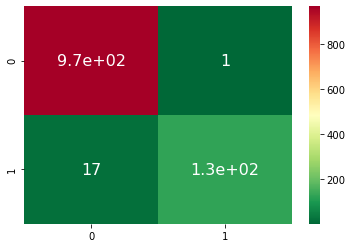

In [162]:
best_pipeline = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=1
)
pipeline4 = best_pipeline.fit(X_train, Y_train)
Y_pred = best_pipeline.predict(X_test)
scores4 = create_classification_report(Y_test, Y_pred)

## Final Report The Dilema of Accuracy and Precision<a id='final'></a>

In [170]:
results = pd.concat([scores1, scores2, scores3, scores4], axis=1)
results.columns = ['pipeline1', 'pipeline2', 'pipeline3', 'pipeline4']
results

,pipeline1,pipeline2,pipeline3,pipeline4
accuracy,0.990117,0.990117,0.977538,0.983827
f1-score,0.961404,0.961404,0.906367,0.934783
precision,0.985612,0.985612,1.000000,0.992308
recall,0.938356,0.938356,0.828767,0.883562
roc auc score,0.968144,0.968144,0.914384,0.941264


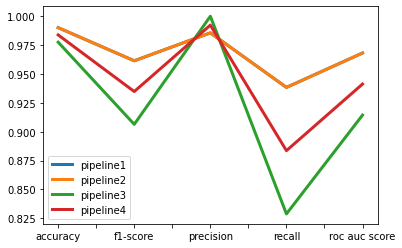

In [174]:
results.plot(kind='line', linewidth=3)

## Dumping the Best Pipeline <a id='dump'></a>

In [187]:
file = open('best_pipeline.pkl', 'wb')
pickle.dump(pipeline2, file)